In [3]:
!pip install statsmodels
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

     ---------------------------------------- 9.1/9.1 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 3.6 MB/s eta 0:00:00


In [10]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/LTOTALNSA.csv", index_col='DATE', parse_dates=True)
df.tail()

,LTOTALNSA
DATE,
2021-01-01,1103.691
2021-02-01,1197.804
2021-03-01,1599.859
2021-04-01,1534.103
2021-05-01,1577.897


In [11]:
df.describe()

,LTOTALNSA
count,545.000000
mean,1234.164415
std,220.083943
min,654.893000
25%,1089.200000
50%,1240.500000
75%,1397.004000
max,1804.325000


In [13]:
df.shape

(545, 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545 entries, 1976-01-01 to 2021-05-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LTOTALNSA  545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


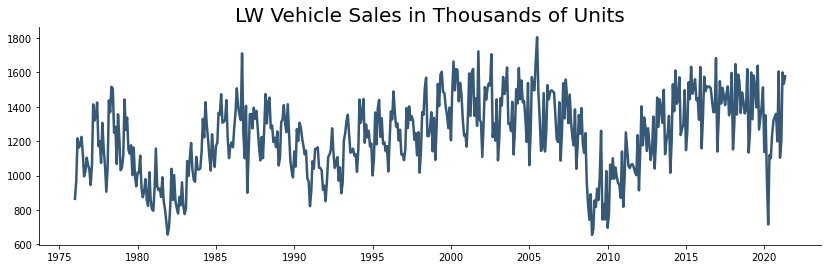

In [14]:
plt.figure(figsize=(14, 4))
plt.title('LW Vehicle Sales in Thousands of Units', size=20)
plt.plot(df)

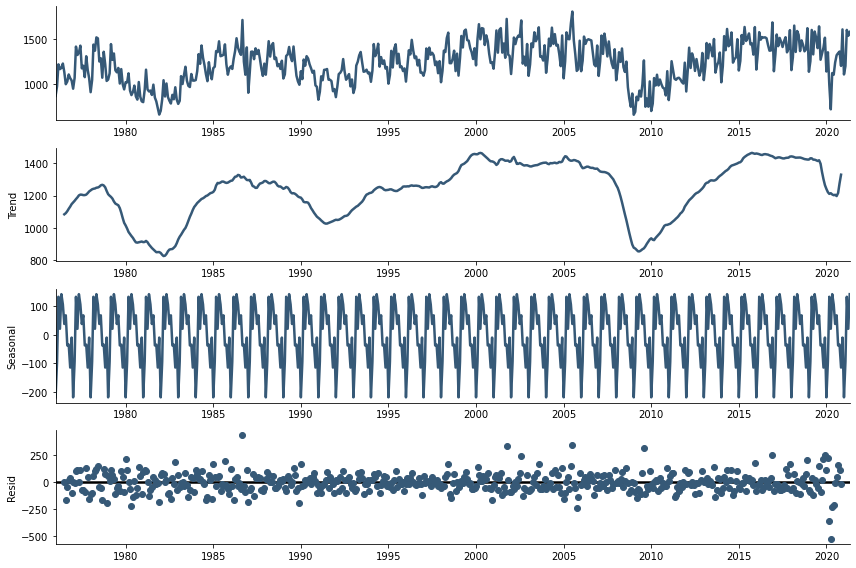

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = 12, 8
seasonal_decompose(df).plot();

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
model = ExponentialSmoothing(
    endog=df['LTOTALNSA'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
forecasts = model.forecast(steps=24)

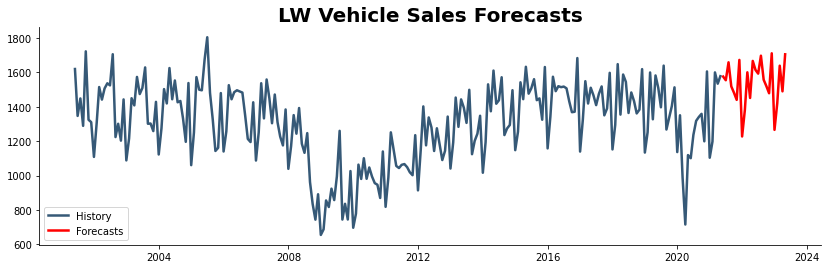

In [20]:
plt.figure(figsize=(14, 4))
plt.title('LW Vehicle Sales Forecasts', size=20, weight="bold")
plt.plot(df[-240:], label='History')
plt.plot(forecasts, label='Forecasts', color='red')
plt.legend()

In [21]:
from datetime import datetime, timedelta
datetime(year=2022, month=12, day=3)

datetime.datetime(2022, 12, 3, 0, 0)

In [22]:
datetime(year=2022, month=12, day=3, hour=13, minute=59, second=44)

datetime.datetime(2022, 12, 3, 13, 59, 44)

In [23]:
datetime.now()

datetime.datetime(2023, 4, 11, 6, 5, 44, 264442)

In [24]:
datetime.now() - timedelta(days=1)

datetime.datetime(2023, 4, 10, 6, 6, 4, 704307)

In [26]:
now = datetime.now()

print(now.year, now.month, now.day, now.hour, now.minute, now.second, sep=",")

2023,4,11,6,6,28


In [27]:
date_list = [
    datetime(2022, 12, 1),
    datetime(2022, 12, 2),
    datetime(2022, 12, 3)
]
date_list

[datetime.datetime(2022, 12, 1, 0, 0),
 datetime.datetime(2022, 12, 2, 0, 0),
 datetime.datetime(2022, 12, 3, 0, 0)]

In [28]:
import numpy as np

date_list = np.array(['2022-12-01', '2022-12-02', '2022-12-03'], dtype='datetime64')
date_list

array(['2022-12-01', '2022-12-02', '2022-12-03'], dtype='datetime64[D]')

In [29]:
date_list = np.array(['2022-12-01', '2022-12-02', '2022-12-03'], dtype='datetime64[s]')
date_list

array(['2022-12-01T00:00:00', '2022-12-02T00:00:00',
       '2022-12-03T00:00:00'], dtype='datetime64[s]')

In [30]:
date_list = np.array(['2022-12-01', '2022-12-02', '2022-12-03'], dtype='datetime64[Y]')
date_list

array(['2022', '2022', '2022'], dtype='datetime64[Y]')

In [31]:
date_list = np.arange('2022-12-01', '2022-12-05', dtype='datetime64[D]')
date_list

array(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04'],
      dtype='datetime64[D]')

In [32]:
date_list = pd.date_range(start='2022-12-01', end='2022-12-05')
date_list

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
               '2022-12-05'],
              dtype='datetime64[ns]', freq='D')

In [33]:
date_list = pd.date_range(start='2022-12-01', periods=10, freq='D')
date_list

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-10'],
              dtype='datetime64[ns]', freq='D')

In [34]:
print(date_list.min())
print(date_list.max())

2022-12-01 00:00:00
2022-12-10 00:00:00


In [35]:
yearly_totals = df.resample(rule='Y').sum()
yearly_totals.head()

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9
1978-12-31,14981.0
1979-12-31,13758.4
1980-12-31,11197.5


In [36]:
quarterly_means = df.resample(rule='Q').mean()
quarterly_means

,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667
...,...
2020-06-30,978.465333
2020-09-30,1298.604000
2020-12-31,1387.852000


In [37]:


df_shift = df.copy()

df_shift['Shift_1'] = df_shift['LTOTALNSA'].shift(1)
df_shift['Shift_2'] = df_shift['LTOTALNSA'].shift(2)

df_shift.head()



,LTOTALNSA,Shift_1,Shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


In [38]:
df_shift = df.copy()

df_shift['Shift_Neg_1'] = df_shift['LTOTALNSA'].shift(-1)
df_shift['Shift_Neg_2'] = df_shift['LTOTALNSA'].shift(-2)

df_shift.tail()

,LTOTALNSA,Shift_Neg_1,Shift_Neg_2
DATE,,,
2021-01-01,1103.691,1197.804,1599.859
2021-02-01,1197.804,1599.859,1534.103
2021-03-01,1599.859,1534.103,1577.897
2021-04-01,1534.103,1577.897,NaN
2021-05-01,1577.897,NaN,NaN


In [39]:
df_rolling = df.copy()
df_rolling['Quarterly_Rolling'] = df_rolling['LTOTALNSA'].rolling(window=3).mean()
df_rolling['Yearly_Rolling'] = df_rolling['LTOTALNSA'].rolling(window=12).mean()
df_rolling.head(15)

,LTOTALNSA,Quarterly_Rolling,Yearly_Rolling
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,NaN,NaN
1976-03-01,1216.1,1018.000000,NaN
1976-04-01,1163.2,1117.533333,NaN
1976-05-01,1176.1,1185.133333,NaN
1976-06-01,1224.9,1188.066667,NaN
1976-07-01,1130.1,1177.033333,NaN
1976-08-01,994.9,1116.633333,NaN
1976-09-01,1024.9,1049.966667,NaN


In [40]:
df_diff = df.copy()

df_diff['Diff_1'] = df_diff['LTOTALNSA'].diff(periods=1)
df_diff['Diff_2'] = df_diff['LTOTALNSA'].diff(periods=2)

df_diff.head()

,LTOTALNSA,Diff_1,Diff_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,108.7,NaN
1976-03-01,1216.1,242.8,351.5
1976-04-01,1163.2,-52.9,189.9
1976-05-01,1176.1,12.9,-40.0


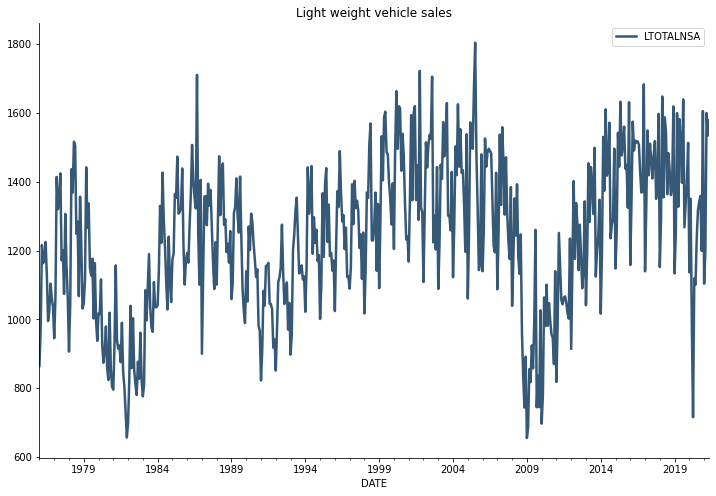

In [41]:
df.plot(title='Light weight vehicle sales');

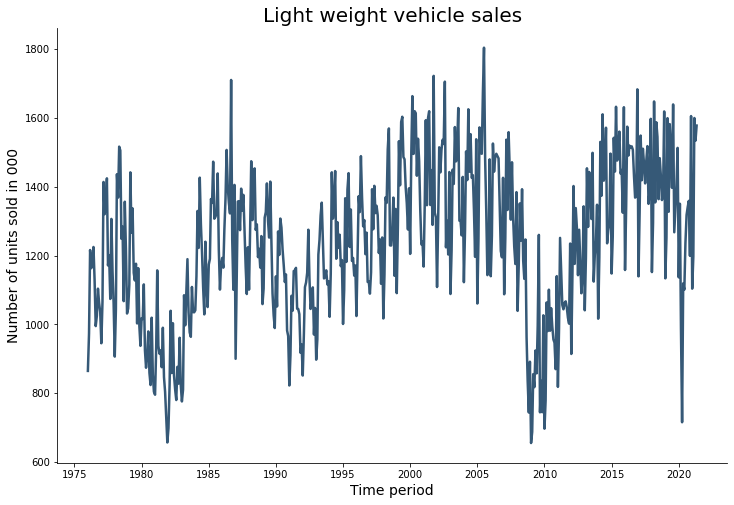

In [42]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time period', size=14)
plt.ylabel('Number of units sold in 000', size=14)

plt.plot(df['LTOTALNSA']);

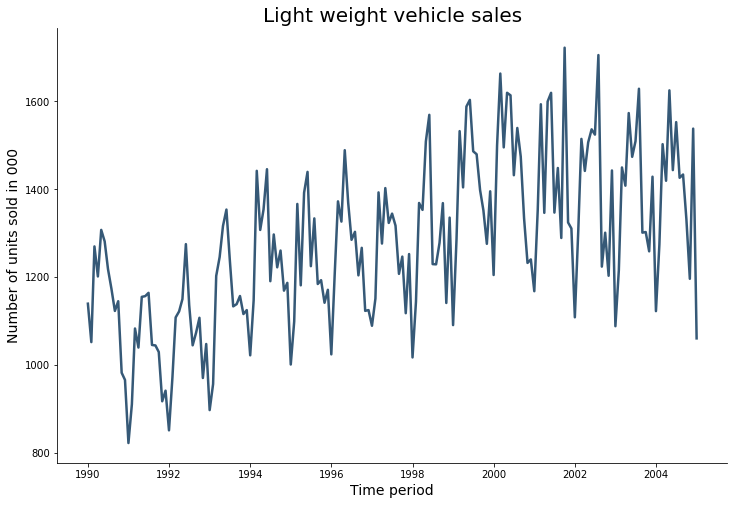

In [43]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time period', size=14)
plt.ylabel('Number of units sold in 000', size=14)
plt.plot(df['LTOTALNSA']['1990-01-01':'2005-01-01']);

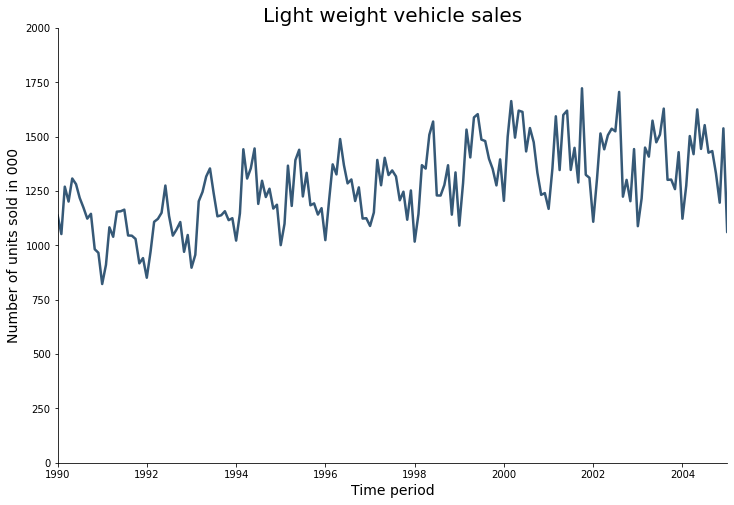

In [44]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time period', size=14)
plt.ylabel('Number of units sold in 000', size=14)
plt.xlim(np.array(['1990-01-01', '2005-01-01'], dtype='datetime64'))
plt.ylim([0, 2000])
plt.plot(df['LTOTALNSA']);



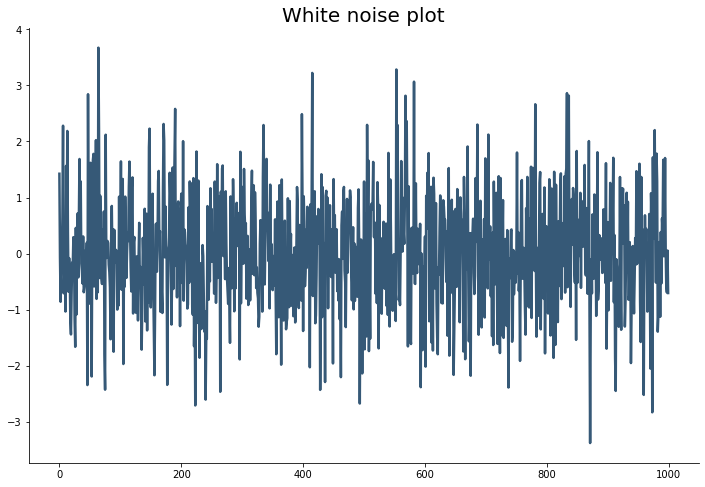

In [45]:
white_noise = np.random.randn(1000)
plt.title('White noise plot', size=20)
plt.plot(np.arange(len(white_noise)), white_noise);

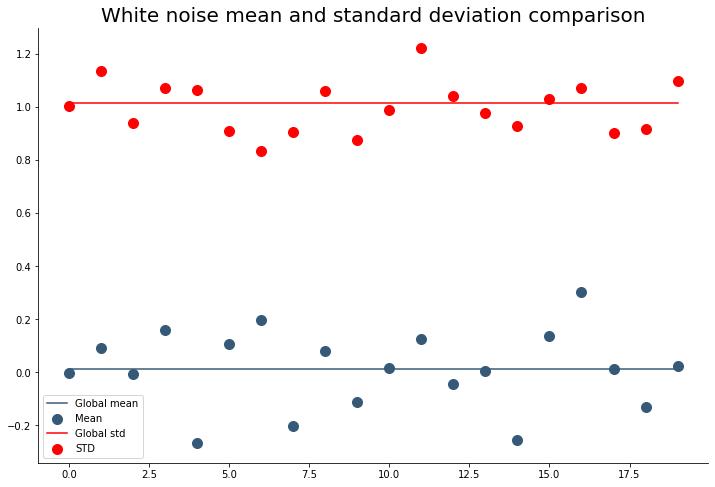

In [48]:
white_noise_chunks = np.split(white_noise, 20)
means, stds = [], []

for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
plt.title('White noise mean and standard deviation comparison', size=20)
plt.plot(np.arange(len(means)), [white_noise.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [white_noise.std()] * len(stds), label='Global std', lw=1.5, color='red')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', s=100, color='red')
plt.legend();

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_116564\187469048.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


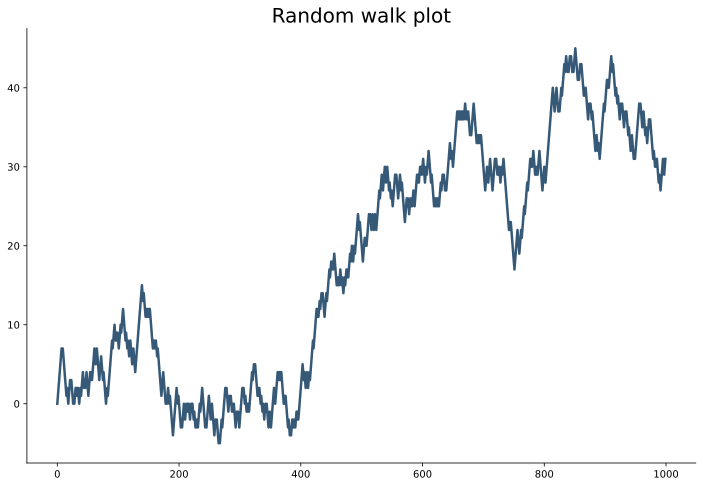

In [51]:
from IPython import display
display.set_matplotlib_formats("svg")
random_walk = [0]

for i in range(1, 1000):
    num = -1 if np.random.random() < 0.5 else 1
    random_walk.append(random_walk[-1] + num)
    
plt.title('Random walk plot', size=20)
plt.plot(np.arange(len(random_walk)), random_walk);

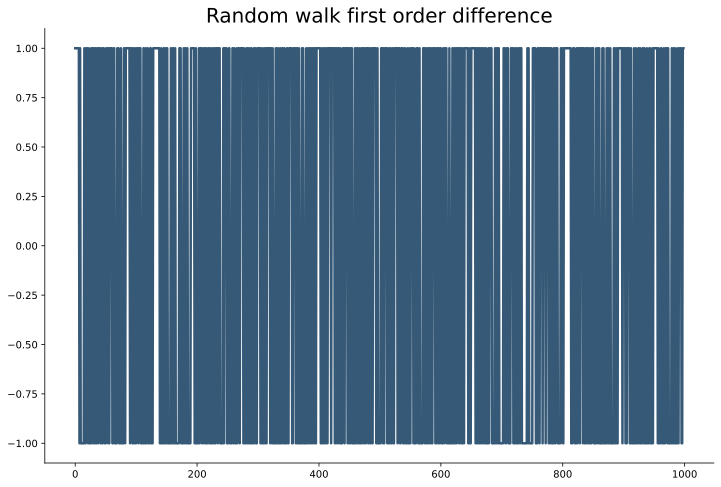

In [53]:
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff().dropna()

plt.title('Random walk first order difference', size=20)
plt.plot(np.arange(len(s_random_walk_diff)), s_random_walk_diff);